# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, ttest_ind
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [3]:
medical.shape

(1338, 8)

In [4]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

(array([[1338.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [1338.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [1338.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [1338.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [1338.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [1338.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [ 457.,  433.,  157.,   94.,   42.,   54.,   62.,   32.,    3.,
            4.],
        [1338.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.]]),
 array([    0.      ,  6377.042801, 12754.085602, 19131.128403,
        25508.171204, 31885.214005, 38262.256806, 44639.299607,
        51016.342408, 57393.385209, 63770.42801 ]),
 <a list of 8 BarContainer objects>)

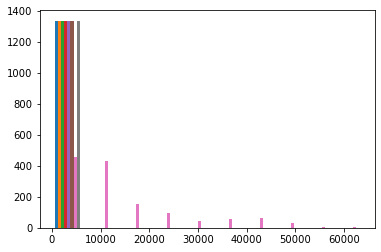

In [5]:
plt.hist(medical)

In [13]:
mean = np.mean(medical)
print(mean)
#Mean seems appropriate for all variables
std = np.std(medical,ddof = 1)
print(std)
#Standard deviation would be interesting for charges, since charges is the only variable that is "wide".
#The other variables should have a very small standard deviation.

age                  39.207025
sex                   0.505232
bmi                  30.663397
children              1.094918
smoker                0.204783
region                1.515695
charges           13270.422265
insuranceclaim        0.585202
dtype: float64
age                  14.049960
sex                   0.500160
bmi                   6.098187
children              1.205493
smoker                0.403694
region                1.104885
charges           12110.011237
insuranceclaim        0.492871
dtype: float64


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__

A t-test would be appropriate, given the skew on charges. The population mean would be estimated as the sample mean in this case, but a t-test will determine percentage of area under the curve at 12,000 or less. This will tell how likely the actual average charge is under 12,000.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

In [8]:
#The confidence interval should be at 95% as standard. A one-sided interval would be appropriate, given
#an estimate of 12,000 or less. 

In [16]:
critical_value = t.ppf(.95,len(medical)-1)
print(critical_value)
confidence_left = mean - (critical_value * (std/np.sqrt(len(medical))))
print(confidence_left['charges'])
confidence_right = mean + (critical_value * (std/np.sqrt(len(medical))))
print(confidence_right['charges'])

1.6459941145571317
12725.48718381623
13815.357346466282


In [ ]:
#The administrator should not be concerned. 12,000 isn't in the 95% confidence interval of 12,725 to 13,815.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__

Both variances are the same, if not very close

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [113]:
#https://www.delftstack.com/howto/python-pandas/split-pandas-dataframe/
groups = medical.groupby(medical.insuranceclaim)
medical1 = groups.get_group(1)
medical0 =groups.get_group(0)
#pulls only charges column from medical1 and medical0
medical1 = medical1['charges']
medical0 = medical0['charges']
mean1 = np.mean(medical1)
print(mean1)
mean0 = np.mean(medical0)
print(mean0)
std1 = np.std(medical1)
print(std1)
std0 = np.std(medical0)
print(std0)
n1 = len(medical1)
print(n1)
n0 = len(medical0)
print(n0)


16423.928276537663
8821.421892306294
14036.956250260411
6440.699841605233
783
555


In [119]:
first_mult = (n1-1)
second_mult = (n0-1)
third_mult = first_mult * (std1**2)
fourth_mult = second_mult * (std0**2)
adding = third_mult + fourth_mult
fifth_part = n0+n1-2
dividing = adding/fifth_part
std_pooled = np.sqrt(dividing)
std_pooled

11512.282899205744

In [123]:
t_statistic = (mean1-mean0)/((std_pooled)*np.sqrt((1/n1)+(1/n0)))
t_statistic
#Online calculator accessed https://www.omnicalculator.com/statistics/p-value
p_value = 1

11.901306943555385

In [121]:
actual = ttest_ind(medical1,medical0, alternative='less')
actual

Ttest_indResult(statistic=11.893299030876712, pvalue=1.0)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

Yes, zscore will find the corresponding zscore for a sample.


## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test